# $\color{red}{\text{Ejemplos de solución de problemas con Python}}$

# Ejemplo 1

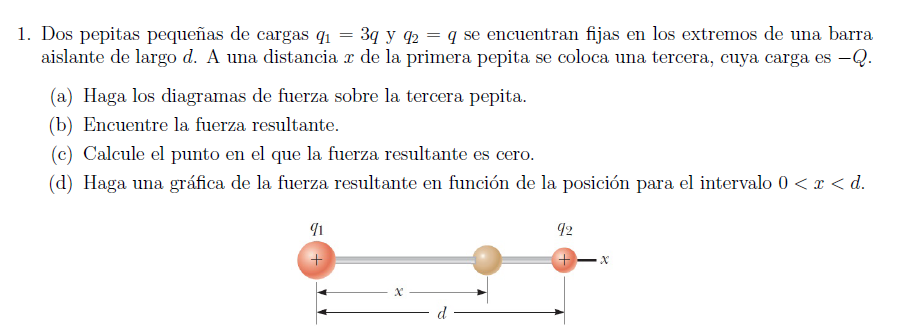

El inciso c) se puede hacer empleando un comando de Python para resolver ecuaciones. Para ello, hay que usar las siguientes librerías:

In [1]:
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sympy as sp

matplotlib.pyplot es parte de la librería para hacer gráficas de funciones y demás.

numpy es para cálculos numéricos y funciones matemáticas (también está math)

pandas es para manejos de tablas de datos (caso que sea necesaria)

sympy es para cálculos simbólicos (uso de expresiones algebraicas, integrales definidas, etc)

Para ejecutar una celda, se hace click sobre ella y se presiona shift + enter. O de manera similar, se puede señalar la celda y hacer click en "run".

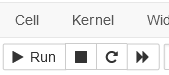

Recuerden que para funciones específicas de librerías, éstas deben ser llamadas con anterioridad. Caso contrario, el comando generaría un error.

El inciso b) generó el siguiente resultado:

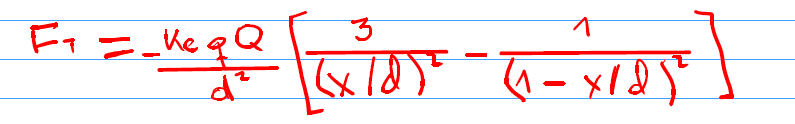

En c) hay que encontrar el punto donde esta función se anula, es decir,

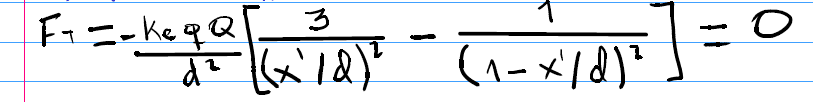

Tal tarea se cumple si se declara una función con una variable simbólica de la siguiente forma:

In [2]:
u = sp.symbols('u')
expr1 = 3/pow(u,2) - 1/pow(1-u,2)

sp.symbols('u') declara la variable u como simbólica (sin valores numéricos). expr1 es una forma de escribir la función que se encuentra entre paréntesis cuadrados en la última igualdad (la cual dará a conocer el punto donde se anula la fuerza). Recuérdese que en este caso, $u=\frac{x'}{d}$.

Habiendo hecho estas declaraciones, se procede a resolver la ecuación aplicando la función sp.solve() de sympy: 

In [3]:
sol1 = sp.solve(expr1)

sol1

[3/2 - sqrt(3)/2, sqrt(3)/2 + 3/2]

La función anterior evalúa expr1 = 0 y encuentra los valores de u para los que se cumple esta igualdad. Se toma el primer resultado porque es la solución que cumple con la hipótesis del problema (la pepita de en medio no puede salirse de la región en medio de las dos cargas).

La gráfica del inciso d) se puede encontrar recurriendo a la siguiente expresión:

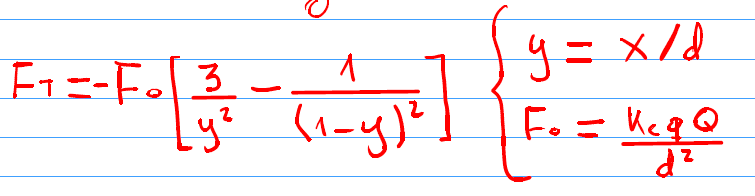

Aquí sí se vuelve necesario hacer evaluaciones numéricas. Para tal propósito, es necesario definir el intervalo donde actúa la fuerza y su función respectiva como se muestra abajo:

In [4]:
inty = np.linspace(0,1,100)

def fuerzat(y):
    return -3/pow(y,2) + 1/pow(1-y,2)

inty es el intervalo de cero a uno partido 100 veces dado por np.linspace(0,1,100). fuerzat(y) es una función que regresa un número según el valor de y ingresado.

La gráfica se hace de manera un poco más elaborada (y complicada -por así decirlo-). Para ello, se ejecuta lo siguiente:

<IPython.core.display.Javascript object>


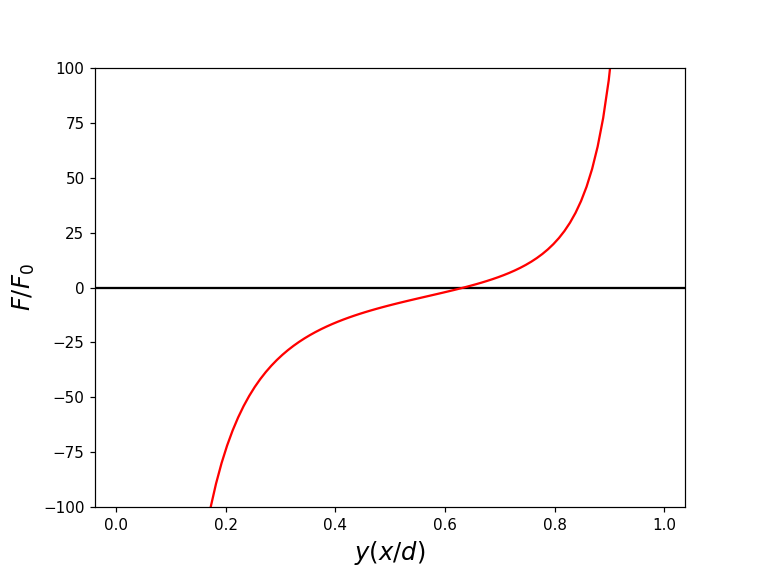

C:\Users\angry\AppData\Local\Temp/ipykernel_17088/2976631276.py:4: RuntimeWarning: divide by zero encountered in true_divide
  return -3/pow(y,2) + 1/pow(1-y,2)


In [5]:
plt.figure()
plt.xlabel('$y (x/d)$', fontsize=16, fontweight='bold')
plt.ylabel('$F/F_{0}$', fontsize=16, fontweight='bold')
plt.ylim([-100,100])
plt.axhline(0, color = 'black')
plt.plot(inty,fuerzat(inty), 'r-')

plt.figure() es el comando de plt que permite hacer gráficas.

plt.xlabel('$y (x/d)$', fontsize=16, fontweight='bold'), plt.ylabel('$F/F_{0}$', fontsize=16, fontweight='bold'):

Las anteriores son las etiquetas de los ejes coordenados x y y. Allí se especifica qué tamaño tiene la etiqueta con fontsize y si está en negrilla con fontweight.

plt.ylim([-100,100]):

Aquí se establece el intervalo para el eje y.

plt.axhline(0, color = 'black'):

Con ésto se grafica una línea recta horizontal en y = 0 de color negro.

plt.plot(inty,fuerzat(inty), 'r-'):

Este último sería el comando más importante: allí se le pide al programa que haga una gráfica con plt.plot que tome el intervalo inty y que lo reemplace en la función fuerzat(); es decir, va a tomar cada punto de inty, y lo va a mapear en otro punto en fuerzat(). 'r-' es para especificar que la gráfica sea roja y continua.

# Ejemplo 2

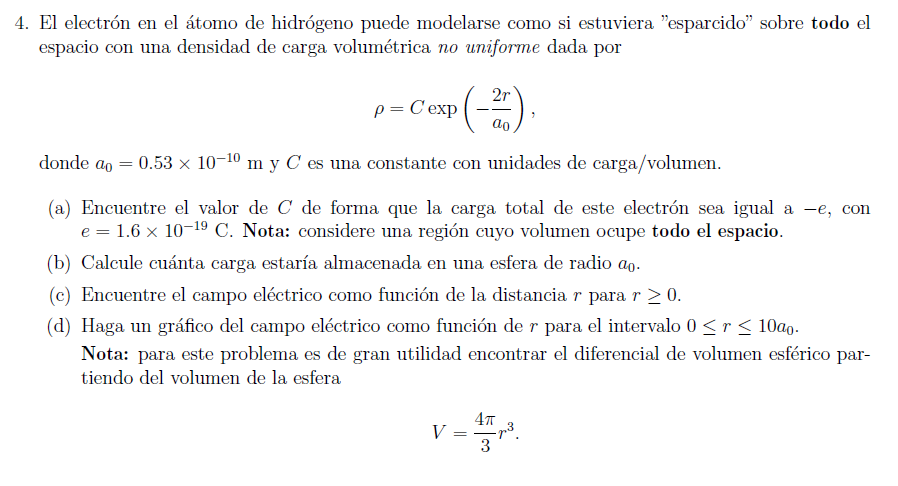

El inciso a) es un buen ejemplo de cómo utilizar comandos de integración numérica en python. Para ello, hay que recordar la integral que se dedujo para hacer el cálculo de la constante C:

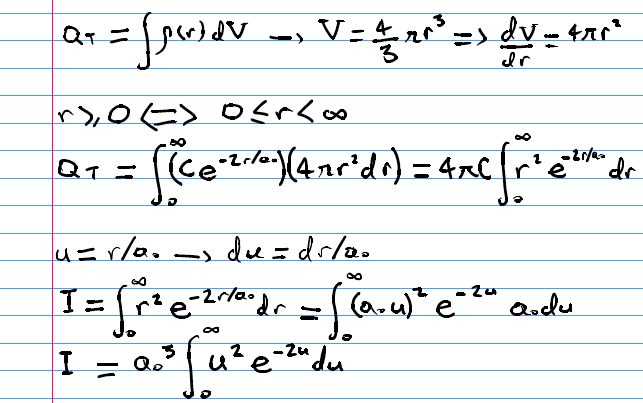

La integral importante es aquella dada por 

\begin{equation}
I = a_{0}^{3}\int_{0}^{\infty}u^{2}e^{-2u}du
\end{equation}

Primero, se debe importar el comando de integración numérica en una dimensión así:

In [6]:
from scipy import integrate

Luego, hay que crear una función que represente al integrando de interés. Se puede hacer de la manera anterior (definiendo una función), o a través de una expresión lambda, es decir,

In [7]:
funq = lambda x: (x**2)*np.exp(-2*x)

Las expresiones lambda son otra manera de escribir funciones. Allí se especifica que la función funq tendrá como argumento la variable x, y esta variable es mapeada a la expresión (x ** 2)* np.exp(-2* x), donde x ** 2 es x al cuadrado y np.exp(-2* x) es la exponencial con argumento -2x. 

La "sublibrería" integrate tiene la función encargada de integrar numéricamente funciones; esa función es integrate.quad(f, x1, x2), en donde f es la función a integrar, x1 es el límite superior y x2 el límite superior. Para el caso de este problema, la integración se escribe como se muestra abajo:

In [8]:
integrate.quad(funq, 0, np.inf)

(0.24999999999999997, 3.4082554319314575e-11)

El primer resultado es el valor de la integral. El segundo resultado es el error asociado que, como se puede ver, es bastante bajo (10 órdenes de magnitud menor). Redondeando el primer número a 0.25 y reemplazando en I, se llega a que

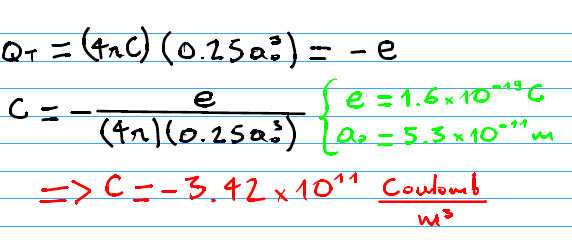

# Ejemplo 3

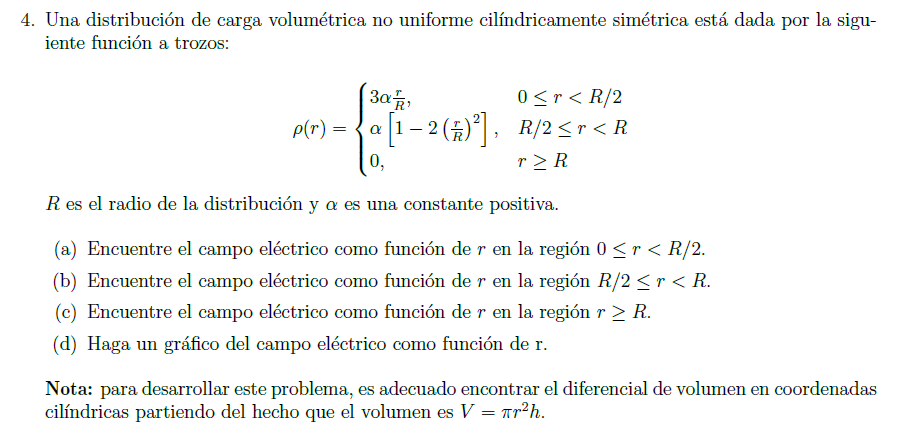

El inciso d) es un ejemplo de una gráfica de una función definida a trozos. Como se pudo ver en el taller, la solución la dan los tres incisos anteriores. 

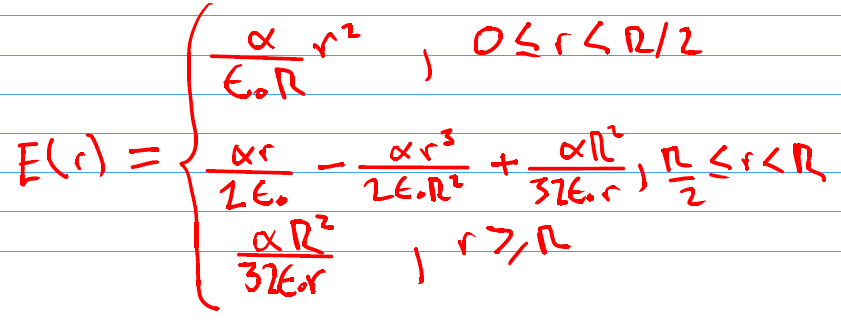

Normalizando al campo en la frontera $E_{0}=\frac{\alpha R}{\epsilon_{0}}$ y definiendo una variable adimensional $t = \frac{r}{R}$, se llega a que 

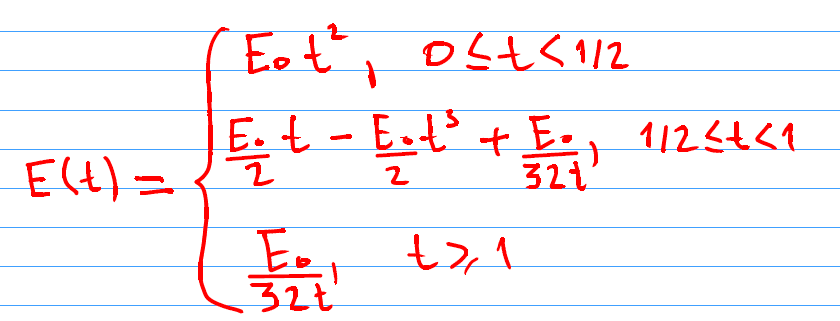

Los intervalos de esta función partida en 3 pedazos se muestran a continuación:

In [9]:
intu1 = np.linspace(0,1/2,500)
intu2 = np.linspace(1/2,1,500)
intu3 = np.linspace(1,4,500)

La gráfica es la siguiente:

<IPython.core.display.Javascript object>


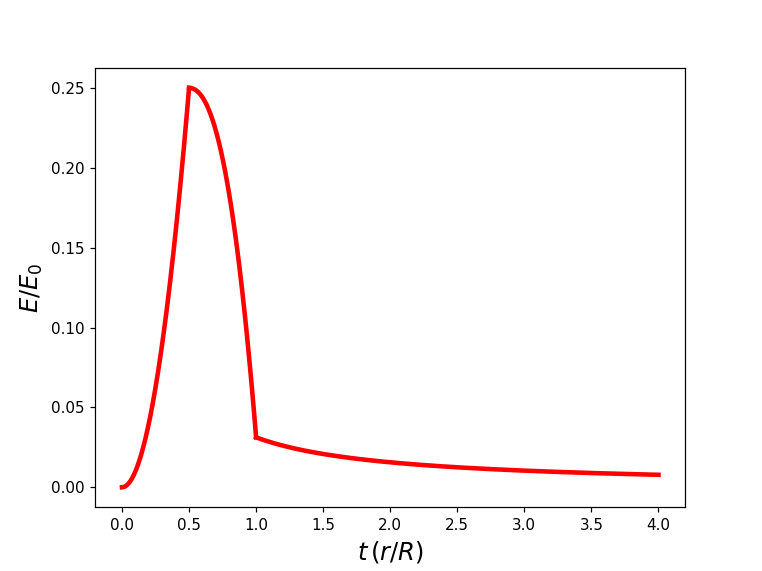

In [10]:
plt.figure()
plt.xlabel('$t\,(r/R)$', fontsize=16)
plt.ylabel('$E/E_{0}$', fontsize=16)

plt.plot(intu1,pow(intu1,2), 'r-', linewidth=3.0)
plt.plot(intu2,pow(intu2,1)/2 - pow(intu2,3)/2 + pow(intu2,-1)/32, 'r-', linewidth=3.0)
plt.plot(intu3,pow(intu3,-1)/32, 'r-', linewidth=3.0)

plt.plot(intu1,pow(intu1,2), 'r-', linewidth=3.0): gráfica para el primer intervalo de t ($0\leq t <1/2$)

plt.plot(intu2,pow(intu2,1)/2 - pow(intu2,3)/2 + pow(intu2,-1)/32, 'r-', linewidth=3.0): gráfica para el segundo intervalo de t ($1/2\leq t <1$)

plt.plot(intu3,pow(intu3,-1)/32, 'r-', linewidth=3.0): gráfica para el segundo intervalo de t ($t\leq 1$).

pow(intu1,2) toma cada punto del intervalo intu1 y lo eleva al cuadrado. En el caso de la segunda función, pow(intu2,-1) toma cada punto de intu1 y lo eleva a la -1, mientras que pow(intu2,3) hace la elevación al cubo.